# Imports:

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from skopt.plots import plot_convergence
from skopt import gp_minimize
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
%matplotlib inline

# Data loading:

In [59]:
data = pd.read_csv('winequality-red.csv')

In [60]:
data['vinho_bom'] = data['quality'].map(lambda x: 0 if x < 7 else 1)

In [61]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vinho_bom
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [62]:
data['vinho_bom'].value_counts()

vinho_bom
0    1382
1     217
Name: count, dtype: int64

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data.iloc[:,:-2], data['vinho_bom'], test_size=0.5, random_state=0)

In [64]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((799, 11), (800, 11), (799,), (800,))

In [65]:
Xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
523,9.3,0.40,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4
626,8.8,0.60,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0
155,7.1,0.43,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5


# Model:

In [66]:
def treinar_model(params):

    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]

    model = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                            subsample=subsample, colsample_bytree=colsample_bytree, n_estimators=100, random_state=0, subsample_freq=1)  
    
    model.fit(Xtrain, ytrain)

    p = model.predict_proba(Xtest)[:,1] # probabilidade de ser vinho bom
 
    return -roc_auc_score(ytest, p)

Treino teste:

In [67]:
params = [1e-2, 65, 50, 0.55, 0.55]

resultado = - treinar_model(params)

print(f"Acurácia inicial: {resultado}.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 126, number of negative: 673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157697 -> initscore=-1.675463
[LightGBM] [Info] Start training from score -1.675463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

Definição de espaço de parâmetros:

In [68]:
space = [(1e-3, 1e-1, 'log-uniform'), # learning_rate
            (2, 128), # num_leaves
            (1, 100), # min_child_samples
            (0.05, 1.0), # subsample
            (0.1, 1.0)] # colsample_bytree

# Utilizando a otimização Baysiana:

In [69]:
resultados_gp = gp_minimize(treinar_model, space, random_state=0, n_calls=30, n_random_starts=10, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 126, number of negative: 673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157697 -> initscore=-1.675463
[LightGBM] [Info] Start training from score -1.675463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0361
Function value obtained: -0.8676
Current minimum: -0.8676
Iteration No: 2 started. Evaluating function at random point.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 126, number of negative: 673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157697 -> initscore=-1.675463
[LightGBM] [Info] Start training from score -1.675463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [70]:
resultados_gp.x

[0.04210536704211821, 62, 40, 0.8442748253605089, 0.40365654437554166]

Observando convergência:

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

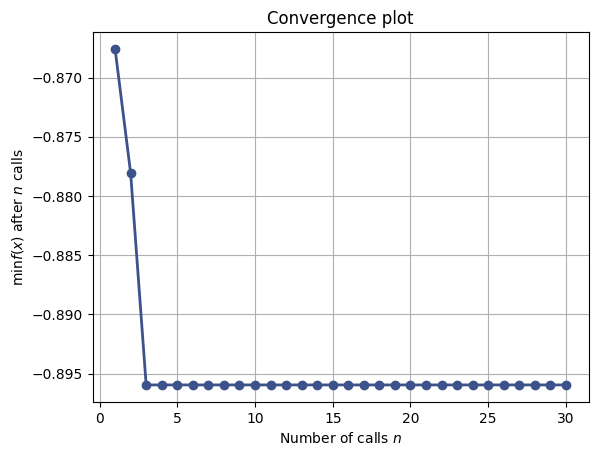

In [71]:
plot_convergence(resultados_gp)

In [ ]:
resultado2 = - treinar_model(resultados_gp.x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 126, number of negative: 673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157697 -> initscore=-1.675463
[LightGBM] [Info] Start training from score -1.675463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [74]:
print(f'Acurácia inical: {resultado}.')
print(f"Acurácia obtida após otimização baysiana: {resultado2}.")

Acurácia inical: 0.8675118957206406.
Acurácia obtida após otimização baysiana: 0.8959531300857112.
